# API Set up

In [57]:
#Import Libraries

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

#Pull in data

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',    #only showing top 15
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c05483ca-9ad4-4fab-8395-fdde088bf386',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-09-25T14:32:53.877Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 9803}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11721, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [59]:
type(data)

dict

In [83]:
import pandas as pd

pd.set_option('display.max_columns',None)     #to show max columns in the data frame 

In [63]:
#Normalising data and adding timestamp column

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')     
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11721,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.975880e+07,1.975880e+07,False,NaN,1,NaN,NaN,None,2024-09-25T14:31:00.000Z,63686.012964,2.810398e+10,5.8510,0.236363,1.183341,6.921209,0.141332,-7.669761,2.389010,1.258359e+12,56.1333,1.337406e+12,None,2024-09-25T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:33:03.016796
1,1027,Ethereum,ETH,ethereum,9346,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203624e+08,1.203624e+08,True,NaN,2,NaN,NaN,None,2024-09-25T14:30:00.000Z,2622.073101,1.481155e+10,-11.9220,0.229929,1.032161,13.860218,-3.531247,-20.560580,-24.306277,3.155990e+11,14.0659,3.155990e+11,None,2024-09-25T14:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:33:03.016796
2,825,Tether USDt,USDT,tether,98646,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.192348e+11,1.213868e+11,True,NaN,3,NaN,NaN,None,2024-09-25T14:30:00.000Z,1.000071,5.452321e+10,2.7250,0.020166,0.008825,0.019414,-0.011392,-0.003496,0.046783,1.192432e+11,5.3145,1.213954e+11,None,2024-09-25T14:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-25 15:33:03.016796
3,1839,BNB,BNB,bnb,2242,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459333e+08,1.459333e+08,False,NaN,4,NaN,NaN,None,2024-09-25T14:30:00.000Z,597.323710,1.839378e+09,-13.6117,0.479140,-1.023780,10.322158,6.501255,1.401335,2.363833,8.716945e+10,3.8862,8.716945e+10,None,2024-09-25T14:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:33:03.016796
4,5426,Solana,SOL,solana,740,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.687266e+08,5.852287e+08,True,NaN,5,NaN,NaN,None,2024-09-25T14:30:00.000Z,151.189017,2.667808e+09,13.9050,0.695050,4.180597,17.819017,-3.941674,-18.598049,0.412414,7.086631e+10,3.1577,8.848015e+10,None,2024-09-25T14:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:33:03.016796
5,3408,USDC,USDC,usd-coin,22191,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.602236e+10,3.602236e+10,False,NaN,6,NaN,NaN,None,2024-09-25T14:30:00.000Z,1.000116,5.776043e+09,4.0299,0.021098,0.007658,0.023453,0.014859,0.008532,-0.005341,3.602655e+10,1.6053,3.602655e+10,None,2024-09-25T14:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-25 15:33:03.016796
6,52,XRP,XRP,xrp,1396,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.643451e+10,9.998721e+10,False,NaN,7,NaN,NaN,None,2024-09-25T14:31:00.000Z,0.590483,1.060791e+09,16.6266,0.248303,1.377866,3.849466,-0.008206,-2.088609,23.984601,3.332362e+10,1.4852,5.904830e+10,None,2024-09-25T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:33:03.016796
7,74,Dogecoin,DOGE,dogecoin,1072,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.461039e+11,1.461039e+11,True,NaN,8,NaN,NaN,None,2024-09-25T14:31:00.000Z,0.109378,6.907736e+08,7.4308,0.484440,1.642966,8.830521,1.922643,-19.716571,-12.942236,1.598062e+10,0.7121,1.598062e+10,None,2024-09-25T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:33:03.016796
8,11419,Toncoin,TON,toncoin,568,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.535818e+09,5.112298e+09

In [89]:
#Creating a function to make an automated process 

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',    
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c05483ca-9ad4-4fab-8395-fdde088bf386',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
     # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now') 
    df
      
    if not os.path.isfile(r'/Users/Buddy2/Documents/Python /python scrips/API.csv'):
        df.to_csv(r'/Users/Buddy2/Documents/Python /python scrips/API.csv',header = 'column_names')
    else:
        df.to_csv(r'/Users/Buddy2/Documents/Python /python scrips/API.csv',mode = 'a',header = False)




In [183]:
import os
from time import time 
from time import sleep

# Automating function 

for i in range(333):
    api_runner()
    print('API runner complete')
    sleep(60)
exit()

API runner complete
API runner complete
API runner complete
API runner complete
API runner complete


KeyboardInterrupt: 

In [185]:
# Creating CSV

df0 = pd.read_csv(r'/Users/Buddy2/Documents/Python /python scrips/API.csv')
df0

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11721,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19758796.00000,19758796.00000,False,NaN,1,NaN,NaN,NaN,2024-09-25T14:49:00.000Z,63737.44681,27579287537.45506,2.47380,0.19594,1.12449,6.72917,0.48993,-7.60189,2.94480,1259375208983.23291,56.09650,1338486382907.54004,NaN,2024-09-25T14:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:50:04.891121
1,1,1027,Ethereum,ETH,ethereum,9346,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120362414.22787,120362414.22787,True,NaN,2,NaN,NaN,NaN,2024-09-25T14:48:00.000Z,2622.03385,14557960666.29810,-14.07850,0.28605,0.49633,13.79025,-3.61135,-20.70320,-24.05285,315594324081.98212,14.06030,315594324081.97998,NaN,2024-09-25T14:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:50:04.891121
2,2,825,Tether USDt,USDT,tether,98648,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,119234806111.27129,121386817750.84328,True,NaN,3,NaN,NaN,NaN,2024-09-25T14:48:00.000Z,0.99988,53734495603.83586,0.30140,0.00107,-0.02201,-0.00578,-0.01811,-0.01550,0.08684,119220380747.90224,5.31150,121372132031.03000,NaN,2024-09-25T14:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-25 15:50:04.891121
3,3,1839,BNB,BNB,bnb,2242,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145933341.39961,145933341.39961,False,NaN,4,NaN,NaN,NaN,2024-09-25T14:48:00.000Z,598.64670,1828934925.40090,-14.40150,0.71126,-0.71299,10.34618,6.89539,1.82384,3.08353,87362513051.19156,3.89410,87362513051.19000,NaN,2024-09-25T14:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:50:04.891121
4,4,5426,Solana,SOL,solana,740,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,468726529.04226,585228599.50666,True,NaN,5,NaN,NaN,NaN,2024-09-25T14:48:00.000Z,151.27160,2669343430.77326,13.59470,0.76651,4.15701,17.77876,-3.29393,-18.48053,1.92116,70905012020.53745,3.15970,88528466625.45000,NaN,2024-09-25T14:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:50:04.891121
5,5,3408,USDC,USDC,usd-coin,22191,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,36035901083.57717,36035901083.57717,False,NaN,6,NaN,NaN,NaN,2024-09-25T14:48:00.000Z,0.99990,5690866504.17837,1.92080,-0.00072,-0.01526,-0.00035,0.01253,-0.00024,0.01870,36032445880.12117,1.60570,36032445880.12000,NaN,2024-09-25T14:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-25 15:50:04.891121
6,6,52,XRP,XRP,xrp,1396,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56434507880.00000,99987205428.00000,False,NaN,7,NaN,NaN,NaN,2024-09-25T14:49:00.000Z,0.58954,1049767917.83026,13.85050,0.11860,0.86187,3.47465,-0.22613,-2.07911,24.08515,33270327880.74830,1.48230,58953872604.85000,NaN,2024-09-25T14:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:50:04.891121
7,7,74,Dogecoin,DOGE,dogecoin,1072,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146104236383.70520,146104236383.70520,True,NaN,8,NaN,NaN,NaN,2024-09-25T14:49:00.000Z,0.10960,681165224.12011,4.71660,0.61892,1.85208,8.61510,2.24840,-19.59064,-11.87358,16013676517.86357,0.71360,16013676517.86000,NaN,2024-09-25T14:49:00.000Z,NaN,N

In [187]:
#Removing scienfific notation 

d.set_option('display.float_format',lambda x: '%.5f' % x)

In [189]:
df0

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11721,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19758796.00000,19758796.00000,False,NaN,1,NaN,NaN,NaN,2024-09-25T14:49:00.000Z,63737.44681,27579287537.45506,2.47380,0.19594,1.12449,6.72917,0.48993,-7.60189,2.94480,1259375208983.23291,56.09650,1338486382907.54004,NaN,2024-09-25T14:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:50:04.891121
1,1,1027,Ethereum,ETH,ethereum,9346,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120362414.22787,120362414.22787,True,NaN,2,NaN,NaN,NaN,2024-09-25T14:48:00.000Z,2622.03385,14557960666.29810,-14.07850,0.28605,0.49633,13.79025,-3.61135,-20.70320,-24.05285,315594324081.98212,14.06030,315594324081.97998,NaN,2024-09-25T14:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:50:04.891121
2,2,825,Tether USDt,USDT,tether,98648,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,119234806111.27129,121386817750.84328,True,NaN,3,NaN,NaN,NaN,2024-09-25T14:48:00.000Z,0.99988,53734495603.83586,0.30140,0.00107,-0.02201,-0.00578,-0.01811,-0.01550,0.08684,119220380747.90224,5.31150,121372132031.03000,NaN,2024-09-25T14:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-25 15:50:04.891121
3,3,1839,BNB,BNB,bnb,2242,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145933341.39961,145933341.39961,False,NaN,4,NaN,NaN,NaN,2024-09-25T14:48:00.000Z,598.64670,1828934925.40090,-14.40150,0.71126,-0.71299,10.34618,6.89539,1.82384,3.08353,87362513051.19156,3.89410,87362513051.19000,NaN,2024-09-25T14:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:50:04.891121
4,4,5426,Solana,SOL,solana,740,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,468726529.04226,585228599.50666,True,NaN,5,NaN,NaN,NaN,2024-09-25T14:48:00.000Z,151.27160,2669343430.77326,13.59470,0.76651,4.15701,17.77876,-3.29393,-18.48053,1.92116,70905012020.53745,3.15970,88528466625.45000,NaN,2024-09-25T14:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:50:04.891121
5,5,3408,USDC,USDC,usd-coin,22191,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,36035901083.57717,36035901083.57717,False,NaN,6,NaN,NaN,NaN,2024-09-25T14:48:00.000Z,0.99990,5690866504.17837,1.92080,-0.00072,-0.01526,-0.00035,0.01253,-0.00024,0.01870,36032445880.12117,1.60570,36032445880.12000,NaN,2024-09-25T14:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-25 15:50:04.891121
6,6,52,XRP,XRP,xrp,1396,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56434507880.00000,99987205428.00000,False,NaN,7,NaN,NaN,NaN,2024-09-25T14:49:00.000Z,0.58954,1049767917.83026,13.85050,0.11860,0.86187,3.47465,-0.22613,-2.07911,24.08515,33270327880.74830,1.48230,58953872604.85000,NaN,2024-09-25T14:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-25 15:50:04.891121
7,7,74,Dogecoin,DOGE,dogecoin,1072,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146104236383.70520,146104236383.70520,True,NaN,8,NaN,NaN,NaN,2024-09-25T14:49:00.000Z,0.10960,681165224.12011,4.71660,0.61892,1.85208,8.61510,2.24840,-19.59064,-11.87358,16013676517.86357,0.71360,16013676517.86000,NaN,2024-09-25T14:49:00.000Z,NaN,N

In [155]:
df3 = df0.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.22633,1.02717,6.97097,0.48479,-7.49860,3.17858
Ethereum,0.24046,0.34234,13.88308,-3.75171,-20.72627,-24.04583
Tether USDt,0.01668,-0.00293,-0.00248,-0.01870,-0.01945,0.08964
BNB,0.53645,-0.88061,10.42135,6.73075,1.85656,3.11106
Solana,0.57008,4.02566,17.90294,-3.57162,-18.35382,2.09738
USDC,0.00396,-0.00560,-0.00343,0.00262,-0.01225,0.00848
XRP,0.05319,0.83199,3.61256,-0.28312,-2.02092,24.40733
Dogecoin,0.58760,1.76557,8.85534,2.16162,-19.28923,-11.67287
Toncoin,0.24858,3.57880,2.97016,2.05207,-14.87108,-25.63741


In [157]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.22633
             quote.USD.percent_change_24h     1.02717
             quote.USD.percent_change_7d      6.97097
             quote.USD.percent_change_30d     0.48479
             quote.USD.percent_change_60d    -7.49860
             quote.USD.percent_change_90d     3.17858
Ethereum     quote.USD.percent_change_1h      0.24046
             quote.USD.percent_change_24h     0.34234
             quote.USD.percent_change_7d     13.88308
             quote.USD.percent_change_30d    -3.75171
             quote.USD.percent_change_60d   -20.72627
             quote.USD.percent_change_90d   -24.04583
Tether USDt  quote.USD.percent_change_1h      0.01668
             quote.USD.percent_change_24h    -0.00293
             quote.USD.percent_change_7d     -0.00248
             quote.USD.percent_change_30d    -0.01870
             quote.USD.percent_change_60d    -0.01945
             quote.USD.percent_change_90

In [115]:
type(df4)   

pandas.core.series.Series

In [159]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.22633
            quote.USD.percent_change_24h   1.02717
            quote.USD.percent_change_7d    6.97097
            quote.USD.percent_change_30d   0.48479
            quote.USD.percent_change_60d  -7.49860
            quote.USD.percent_change_90d   3.17858
Ethereum    quote.USD.percent_change_1h    0.24046
            quote.USD.percent_change_24h   0.34234
            quote.USD.percent_change_7d   13.88308
            quote.USD.percent_change_30d  -3.75171
            quote.USD.percent_change_60d -20.72627
            quote.USD.percent_change_90d -24.04583
Tether USDt quote.USD.percent_change_1h    0.01668
            quote.USD.percent_change_24h  -0.00293
            quote.USD.percent_change_7d   -0.00248
            quote.USD.percent_change_30d  -0.01870
            quote.USD.percent_change_60d  -0.01945
            quote.USD.percent_change_90d   0.08964
BNB         quote.USD.percent_change_1h    0.53645
            quote.USD.percent_change_24h  -0.88061
            quote.USD.percent_change_7d   10.42135
            quote.USD.percent_change_30d   6.73075
            quote.USD.percent_change_60d   1.85656
            quote.USD.percent_change_90d   3.11106
Solana      quote.USD.percent_change_1h    0.57008
            quote.USD.percent_change_24h   4.02566
            quote.USD.percent_change_7d   17.90294
            quote.USD.percent_change_30d  -3.57162
            quote.USD.percent_change_60d -18.35382
            quote.USD.percent_change_90d   2.09738
USDC        quote.USD.percent_change_1h    0.00396
            quote.USD.percent_change_24h  -0.00560
            quote.USD.percent_change_7d   -0.00343
            quote.USD.percent_change_30d   0.00262
            quote.USD.percent_change_60d  -0.01225
            quote.USD.percent_change_90d   0.00848
XRP         quote.USD.percent_change_1h    0.05319
            quote.USD.percent_change_24h   0.83199
            quote.USD.percent_change_7d    3.61256
            quote.USD.percent_change_30d  -0.28312
            quote.USD.percent_change_60d  -2.02092
            quote.USD.percent_change_90d  24.40733
Dogecoin    quote.USD.percent_change_1h    0.58760
            quote.USD.percent_change_24h   1.76557
            quote.USD.percent_change_7d    8.85534
            quote.USD.percent_change_30d   2.16162
            quote.USD.percent_change_60d -19.28923
            quote.USD.percent_change_90d -11.67287
Toncoin     quote.USD.percent_change_1h    0.24858
            quote.USD.percent_change_24h   3.57880
            quote.USD.percent_change_7d    2.97016
            quote.USD.percent_change_30d   2.05207
            quote.USD.percent_change_60d -14.87108
            quote.USD.percent_change_90d -25.63741
Cardano     quote.USD.percent_change_1h    0.84634
            quote.USD.percent_change_24h   4.40865
            quote.USD.percent_change_7d   16.77253
            quote.USD.percent_change_30d   3.70799
            quote.USD.percent_change_60d  -8.97327
            quote.USD.percent_change_90d  -0.72377
TRON        quote.USD.percent_change_1h    0.08165
            quote.USD.percent_change_24h  -0.86088
            quote.USD.percent_change_7d    0.72237
            quote.USD.percent_change_30d  -9.36812
            quote.USD.percent_change_60d   9.66088
            quote.USD.percent_change_90d  23.01326
Avalanche   quote.USD.percent_change_1h    0.75750
            quote.USD.percent_change_24h   2.81578
            quote.USD.percent_change_7d   20.72431
            quote.USD.percent_change_30d   5.58050
            quote.USD.percent_change_60d  -4.33181
            quote.USD.percent_change_90d   0.79452
Shiba Inu   quote.USD.percent_change_1h    0.92316
            quote.USD.percent_change_24h   5.09136
            quote.USD.percent_change_7d   16.91080
            quote.USD.percent_change_30d   4.15679
            quote.USD.percent_change_60d -11.51372
            quo

In [161]:
df5.count()

values    90
dtype: int64

In [163]:
# Creating index

index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.22633
1,Bitcoin,quote.USD.percent_change_24h,1.02717
2,Bitcoin,quote.USD.percent_change_7d,6.97097
3,Bitcoin,quote.USD.percent_change_30d,0.48479
4,Bitcoin,quote.USD.percent_change_60d,-7.49860
5,Bitcoin,quote.USD.percent_change_90d,3.17858
6,Ethereum,quote.USD.percent_change_1h,0.24046
7,Ethereum,quote.USD.percent_change_24h,0.34234
8,Ethereum,quote.USD.percent_change_7d,13.88308
9,Ethereum,quote.USD.percent_change_30d,-3.75171


In [165]:
df7 = df6.rename(columns = {'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.22633
1,Bitcoin,quote.USD.percent_change_24h,1.02717
2,Bitcoin,quote.USD.percent_change_7d,6.97097
3,Bitcoin,quote.USD.percent_change_30d,0.48479
4,Bitcoin,quote.USD.percent_change_60d,-7.49860
5,Bitcoin,quote.USD.percent_change_90d,3.17858
6,Ethereum,quote.USD.percent_change_1h,0.24046
7,Ethereum,quote.USD.percent_change_24h,0.34234
8,Ethereum,quote.USD.percent_change_7d,13.88308
9,Ethereum,quote.USD.percent_change_30d,-3.75171


In [167]:
# change column names

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

df7

,name,percent_change,values
0,Bitcoin,1h,0.22633
1,Bitcoin,24h,1.02717
2,Bitcoin,7d,6.97097
3,Bitcoin,30d,0.48479
4,Bitcoin,60d,-7.49860
5,Bitcoin,90d,3.17858
6,Ethereum,1h,0.24046
7,Ethereum,24h,0.34234
8,Ethereum,7d,13.88308
9,Ethereum,30d,-3.75171


In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

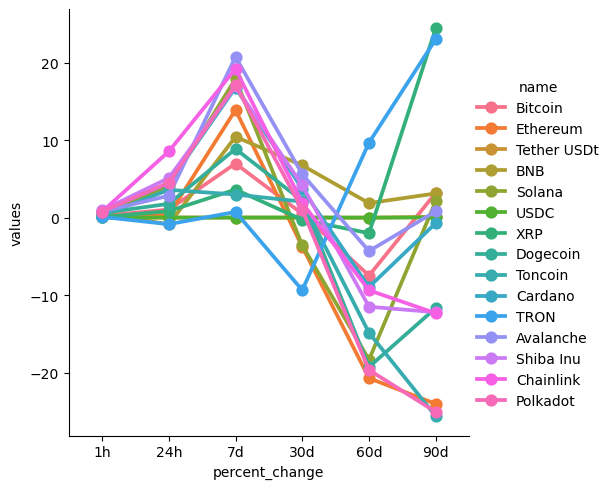

In [169]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [173]:
df10 = df0[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,63737.44681,2024-09-25 15:50:04.891121
15,Bitcoin,63737.44681,2024-09-25 15:50:35.156490
30,Bitcoin,63752.08040,2024-09-25 15:53:19.298016
45,Bitcoin,63752.08040,2024-09-25 15:53:49.538040
60,Bitcoin,63726.00943,2024-09-25 15:54:19.797117
75,Bitcoin,63726.00943,2024-09-25 15:54:50.013701
90,Bitcoin,63750.72814,2024-09-25 15:55:20.274121
105,Bitcoin,63750.72814,2024-09-25 15:55:50.575789
120,Bitcoin,63789.77980,2024-09-25 15:56:20.881245
135,Bitcoin,63870.47910,2024-09-25 15:57:51.268592


In [ ]:
df10['timestamp'] = df10['timestamp'].replace([],[])

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

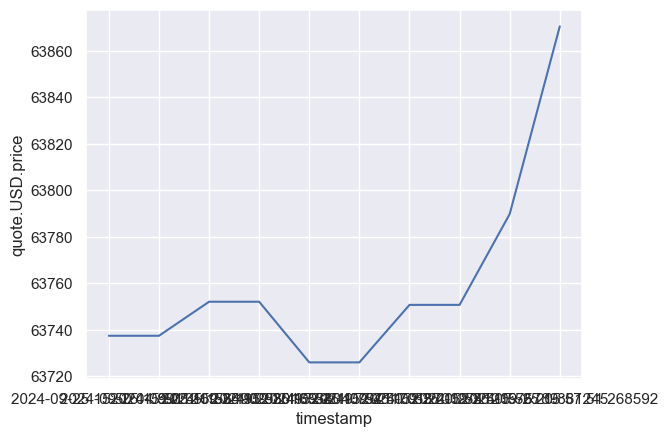

In [179]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp',y='quote.USD.price', data = df10)